# Ensemble

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntRangeSlider, FloatSlider, FloatLogSlider, IntSlider, Checkbox
from sklearn import datasets

In [2]:
n=50
x1=np.random.uniform(-3.2,2,size=n)
b=[45,-6,1.2,-1,0.01]
hata=np.random.normal(0,14,size=n)
y=b[0] \
+b[1]*x1 \
+b[2]*x1**2 \
+b[3]*x1**3 \
+b[4]*x1**4 + hata

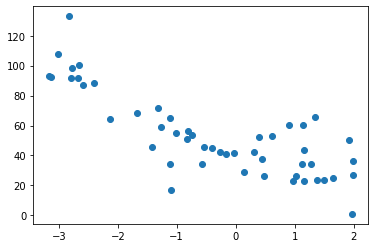

In [3]:
plt.scatter(x1,y);

In [4]:
from sklearn import linear_model, preprocessing, pipeline

In [5]:
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=19, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ('linear', linear_model.LinearRegression(fit_intercept=True))
])

In [6]:
model.fit(x1[:, np.newaxis], y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

In [7]:
t = np.linspace(-3.2, 2, 100)

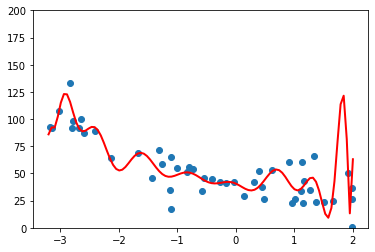

In [8]:
plt.scatter(x1,y);
plt.ylim(0, 200)
plt.plot(t, model.predict(t[:, np.newaxis]), color='red', linewidth=2);

In [9]:
model.score(x1[:, np.newaxis], y)

0.8332351904760824

In [10]:
x2=np.random.uniform(-3.2,2,size=n)
y2=b[0] \
+b[1]*x2 \
+b[2]*x2**2 \
+b[3]*x2**3 \
+b[4]*x2**4 + hata

In [11]:
model.score(x2[:, np.newaxis], y2)

0.1405273945407357

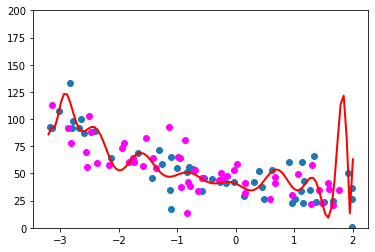

In [12]:
plt.scatter(x1,y);
plt.scatter(x2,y2, color='magenta');
plt.ylim(0, 200)
plt.plot(t, model.predict(t[:, np.newaxis]), color='red', linewidth=2);

## Bootstrapping

Eldeki verileri rastgele ve tekrarli bir sekilde ornekleyerek yeni veri setleri elde ediyoruz.

Bootstrapping ile elde ettigimiz her bir yeni veri seti uzerinde yeni bir model egitiyoruz.

In [13]:
indeskler = np.arange(0,len(y))

In [14]:
indeskler

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [15]:
rassal_indeksler = np.random.choice(indeskler, size=len(y))
rassal_indeksler

array([ 2,  4, 31,  7, 25, 16, 34, 13, 15,  7, 39, 30,  9, 30, 11, 43, 16,
       29, 47, 32, 32, 17, 35, 48, 10,  1,  9, 22, 15, 39, 10, 28, 11,  1,
       28, 48, 26, 31, 32,  4, 28, 20, 20,  6, 40,  7, 39, 18, 37, 18])

## Egitim

Bastan belirlenmis bir tekrar sayisi (bizim durumumuzda 200) icin asagidaki islemleri uygulayacagiz:

1. Bootstrapping teknigi ile yeni bir egitim veri seti uret.
    - Elde edilen egitim veri seti, orijinal veri setinden rastgele ve tekrarli ornekleri iceriyor.
    - Yeni (farkli) veriler soz konusu degil.
2. Yeni bir model egit.
3. Egitilen modeli modeller listesine ekle.

In [16]:
modeller = []

for i in range(200):
    # Bootstrapping
    rassal_indeksler = np.random.choice(indeskler, size=len(y), )
    xp = x1[rassal_indeksler]
    yp = y[rassal_indeksler]


    
    mp = pipeline.Pipeline([
        ('poly', preprocessing.PolynomialFeatures(degree=19, include_bias=False)),
        ("scaler", preprocessing.StandardScaler()),
        ('linear', linear_model.LinearRegression(fit_intercept=True))
    ])
    mp.fit(xp[:, np.newaxis], yp)
    modeller.append(mp)

## Tahmin

Egittigimiz modellerle tahmin yapmak icin asagidaki islemleri uygulayacagiz:

1. Verilen sorguyu her bir modele (bizim durumumuzda 200 model) tahmin ettir.
2. Tahminlerin ortalamasini (ya da uygun gorulen baska bir istatistigini, medyan gibi) al.
    - Biz asagida *medyan*i denedik.
    - > Tasniflendirme durumunda **mod** (oy coklugu) kullanilabilir.
3. Sonucu kullaniciya goster.

In [17]:
ensemble_tahminler = np.median(np.array([mp.predict(t[:, np.newaxis]) for mp in modeller]), axis=0)

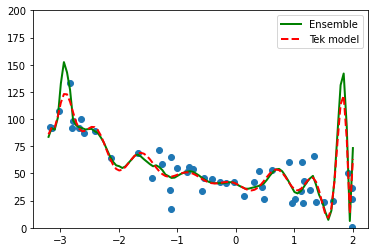

In [18]:
plt.plot(t, ensemble_tahminler, color='green', linewidth=2, label='Ensemble');
plt.plot(t, model.predict(t[:, np.newaxis]), color='red', linewidth=2, label='Tek model', linestyle='--');
plt.ylim(0, 200)
plt.scatter(x1,y)
plt.legend();


In [19]:
modeller[:10]

[Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                 ('scaler', StandardScaler()), ('linear', LinearRegression())]),
 Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                 ('scaler', StandardScaler()), ('linear', LinearRegression())]),
 Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                 ('scaler', StandardScaler()), ('linear', LinearRegression())]),
 Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                 ('scaler', StandardScaler()), ('linear', LinearRegression())]),
 Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                 ('scaler', StandardScaler()), ('linear', LinearRegression())]),
 Pipeline(steps=[('poly', PolynomialFeatures(degree=19, include_bias=False)),
                 ('scaler', StandardScaler()), ('linear', LinearRegression())]),
 Pipeline(steps=[('poly', PolynomialFeatures(d

## Random Forest

Yukaridaki **bagging** algoritmamizda polinomiyel regresyon kullandik.

*Random Forest* algoritmasi, ayni teknigi karar agaclari ile gerceklestirir.

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
decision_tree = DecisionTreeRegressor()

Fitting the model:

In [22]:
decision_tree.fit(x1.reshape(-1,1), y)

DecisionTreeRegressor()

In [23]:
decision_tree.score(x1.reshape(-1, 1), y)

1.0

## Karar agacinin tahminleri

Karar agaci mukemmel bir aciklanabilirlik saglamasina ragmen en buyuk probleminin *overfit* oldugundan bahsetmistik. Asagidaki sekilde bunu tekrar gorebiliriz:

In [24]:
x_range = np.linspace(x1.min(), x1.max(), 1500)

y_range = decision_tree.predict(x_range.reshape(-1, 1))

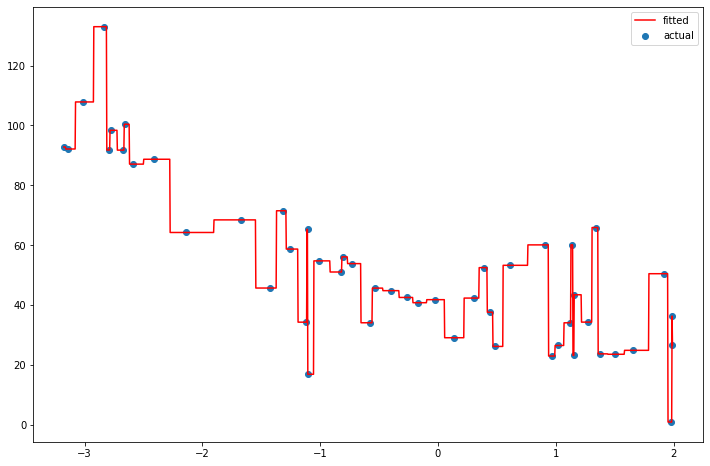

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [26]:
x2=np.random.uniform(-3.2,2,size=n)
y2=b[0] \
+b[1]*x2 \
+b[2]*x2**2 \
+b[3]*x2**3 \
+b[4]*x2**4 + hata

In [27]:
model.score(x2.reshape(-1, 1), y2)

-0.21969892141819525

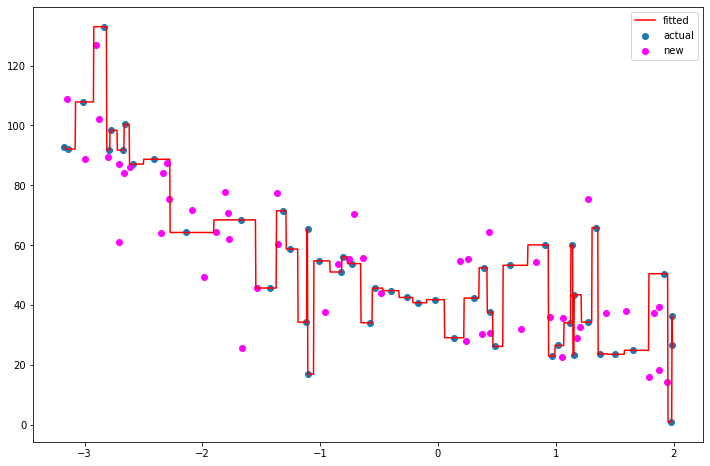

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
plt.scatter(x2,y2, label='new', color='magenta')

plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

## Random Forest tahminleri



Bu tahminleri elde ederken yine karar agaclari kullandik (100 adet), ancak her bir karar agaci orijinal verinin bootstrap teknigi ile elde edilmis bir kopyasi uzerinde egitildi.

In [29]:
from sklearn import ensemble

In [30]:
rf = ensemble.RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1, bootstrap=True)

In [31]:
rf.fit(x1.reshape(-1, 1), y)

RandomForestRegressor(n_jobs=-1, random_state=0)

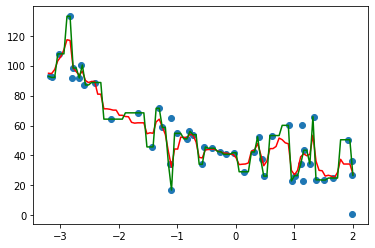

In [32]:
plt.scatter(x1,y, label='actual')
plt.plot(t, rf.predict(t[:, None]), label='rf', color='red')
plt.plot(t, decision_tree.predict(t[:, None]), label='dt', color='green')

In [33]:
rf.score(x2.reshape(-1, 1), y2)

0.6933930770207404

In [34]:
rf.predict([[1]])

array([27.09513847])

### Random Forest icindeki her bir agacin tahminleri

In [35]:
rf.estimators_[0].predict([[1]])

array([26.52749023])

In [36]:
rf.estimators_[1].predict([[1]])

array([23.008747])

In [37]:
rf.estimators_[2].predict([[1]])

array([26.52749023])

Tum agaclarin tahminlerinin ortalamasi:

In [38]:
np.mean([rf.estimators_[i].predict([[1]]) for i in range(100)])

27.09513847060267

## Random forest parametrelerine gore tahminlerin degisimi

### Regresyon

Asagidaki interaktif hucrede farkli parametreler icin Random Forest modelinin kararlarindaki degisimi gozlemleyebilirsiniz.

> - Hangi parametre kombinasyonu ile **Decision Tree** ile ayni ciktiyi elde edebilirsiniz?
> - Farkli budama tekniklerinin etkisini inceleyiniz.

In [40]:
@interact
def rfviz(max_depth=IntSlider(min=1, max=20, step=1, value=5, description='Max depth:', continuous_update=True),
          min_samples_split=IntSlider(min=2, max=20, step=1, value=2, description='Min samples split:', continuous_update=True),
          min_samples_leaf=IntSlider(min=1, max=20, step=1, value=1, description='Min samples leaf:', continuous_update=True),
          n_estimators=FloatLogSlider(min=0, max=8, value=1, base=2, step=1, description='n_estimators:', continuous_update=True),
          bootstrap=Checkbox(value=True, description='Bootstrap:', continuous_update=True),):
    rf = ensemble.RandomForestRegressor(
        n_estimators=int(n_estimators), 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=0, 
        n_jobs=-1, 
        bootstrap=bootstrap
        )
    rf.fit(x1.reshape(-1, 1), y)
    plt.scatter(x1,y, label='actual')
    plt.plot(t, rf.predict(t[:, None]), label='rf', color='red')
    plt.plot(t, decision_tree.predict(t[:, None]), label='dt', color='green', alpha=0.4)
    plt.legend()

interactive(children=(IntSlider(value=5, description='Max depth:', max=20, min=1), IntSlider(value=2, descript…

### Tasniflendirme

In [49]:
Xc, yc = datasets.make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=0, shuffle=True,
class_sep=0.5)

Asagidaki interaktif hucrede farkli parametreler icin Random Forest modelinin kararlarindaki degisimi gozlemleyebilirsiniz.

> En iyi sonuclari hangi parametre kombinasyonunda elde ettiniz?

In [52]:
@interact
def rfclfviz(max_depth=IntSlider(min=1, max=20, step=1, value=5, description='Max depth:', continuous_update=True),
          min_samples_split=IntSlider(min=2, max=20, step=1, value=2, description='Min samples split:', continuous_update=True),
          min_samples_leaf=IntSlider(min=1, max=20, step=1, value=1, description='Min samples leaf:', continuous_update=True),
          n_estimators=FloatLogSlider(min=0, max=8, value=1, base=2, step=1, description='n_estimators:', continuous_update=True),
          bootstrap=Checkbox(value=True, description='Bootstrap:', continuous_update=True),):
    rf = ensemble.RandomForestClassifier(
        n_estimators=int(n_estimators), 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=0, 
        n_jobs=-1, 
        bootstrap=bootstrap
        )
    rf.fit(Xc, yc)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(Xc[:, 0], Xc[:, 1], c=yc)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


interactive(children=(IntSlider(value=5, description='Max depth:', max=20, min=1), IntSlider(value=2, descript…

## Ozel bagging regressor/tasniflendirici olusturma

In [53]:
bgr = ensemble.BaggingRegressor(
    pipeline.Pipeline([
        ('poly', preprocessing.PolynomialFeatures(degree=19, include_bias=False)),
        ("scaler", preprocessing.StandardScaler()),
        ('linear', linear_model.LinearRegression(fit_intercept=True))
    ]),
    n_estimators=200,
    random_state=0,
    n_jobs=-1,
)

In [54]:
bgr.fit(x1.reshape(-1, 1), y)

BaggingRegressor(base_estimator=Pipeline(steps=[('poly',
                                                 PolynomialFeatures(degree=19,
                                                                    include_bias=False)),
                                                ('scaler', StandardScaler()),
                                                ('linear',
                                                 LinearRegression())]),
                 n_estimators=200, n_jobs=-1, random_state=0)

(0.0, 200.0)

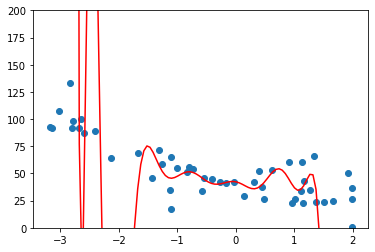

In [55]:
plt.scatter(x1,y, label='actual')
plt.plot(t, bgr.predict(t[:, None]), label='bgr', color='red')
plt.ylim(0, 200)

## Hiperparametre optimizasyonu: GridSearch

In [56]:
from sklearn import model_selection

In [57]:
gs = model_selection.GridSearchCV(
    estimator=ensemble.AdaBoostRegressor(),
    param_grid={
        "learning_rate": [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100], 
        "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
        },
    scoring="r2",
    cv=model_selection.KFold(n_splits=5, shuffle=True, random_state=0),
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
)

In [58]:
gs.fit(x1.reshape(-1, 1), y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

In [ ]:
gs.predict([[1],[2],[3],[4],[5]])

array([37.70449373, 37.70449373, 37.70449373, 37.70449373, 37.70449373])

In [ ]:
gs.best_params_

{'learning_rate': 10, 'n_estimators': 600}

In [ ]:
gs.best_score_

0.2956199078356526

Sonuclarin gorsellestirilmesi:

In [ ]:
import pandas as pd

In [ ]:
cvr = pd.DataFrame(gs.cv_results_)[['param_learning_rate', 'param_n_estimators', 'mean_test_score', 'mean_train_score']]

<AxesSubplot:xlabel='param_learning_rate'>

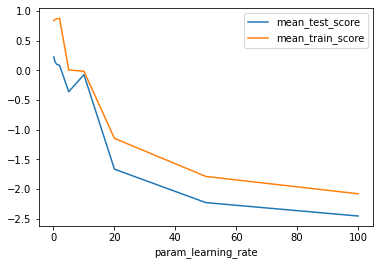

In [ ]:
cvr.groupby(['param_learning_rate']).mean().sort_values(by='mean_test_score', ascending=False).sort_index().plot()

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='param_n_estimators', ylabel='param_learning_rate'>

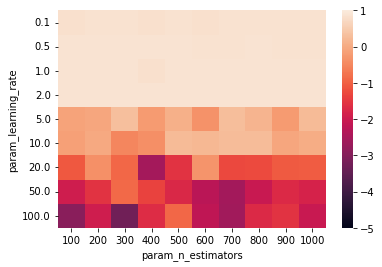

In [ ]:
sns.heatmap(cvr.pivot_table(index='param_learning_rate', columns='param_n_estimators', values='mean_train_score'), vmin=-5, vmax=1)

<AxesSubplot:xlabel='param_n_estimators', ylabel='param_learning_rate'>

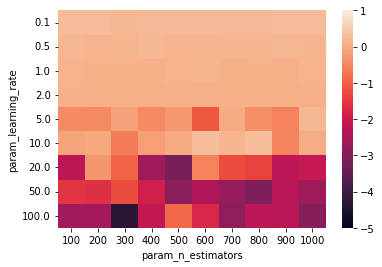

In [ ]:
sns.heatmap(cvr.pivot_table(index='param_learning_rate', columns='param_n_estimators', values='mean_test_score'), vmin=-5, vmax=1)

In [ ]:
gs = model_selection.GridSearchCV(
    estimator=ensemble.AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1)),
    param_grid={
        "learning_rate": np.linspace(0.1, 2, 10), 
        "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
        },
    scoring="r2",
    cv=model_selection.KFold(n_splits=5, shuffle=True, random_state=0),
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
)

In [ ]:
gs.fit(x1.reshape(-1, 1), y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1       , 0.31111111, 0.52222222, 0.73333333, 0.94444444,
       1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ]),
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cvr = pd.DataFrame(gs.cv_results_)[['param_learning_rate', 'param_n_estimators', 'mean_test_score', 'mean_train_score']]

<AxesSubplot:xlabel='param_n_estimators', ylabel='param_learning_rate'>

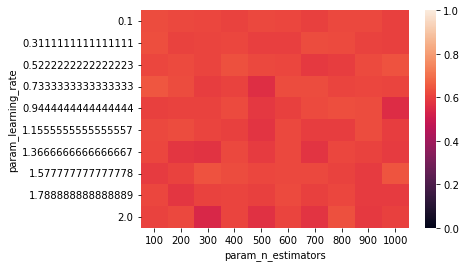

In [ ]:
sns.heatmap(cvr.pivot_table(index='param_learning_rate', columns='param_n_estimators', values='mean_train_score'), vmin=0, vmax=1)

<AxesSubplot:xlabel='param_n_estimators', ylabel='param_learning_rate'>

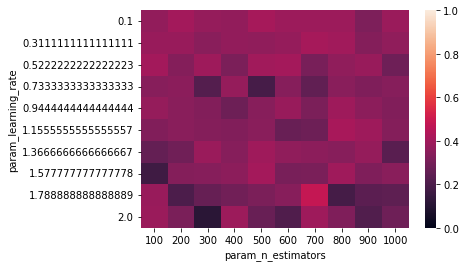

In [ ]:
sns.heatmap(cvr.pivot_table(index='param_learning_rate', columns='param_n_estimators', values='mean_test_score'), vmin=0, vmax=1)